# Analyzing Data

We begin by importing some helper functions

In [5]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article. 

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)


Let's print the first three rows

In [108]:
index = 0
row = data[index][:-1]
row[0] = fetch_year(row[0])


for element in data:
    row = data[index][:-1]
    row[0] = fetch_year(row[0])
    if index <= 2:
        print(row)
        index = index + 1

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


In [93]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]



years = []
for year in range(fetch_year(min_year), fetch_year(max_year) + 1):
    years.append(year)
    
attempts_per_year = []

for i in range(len(years)):
    if i <= len(years) - 1:
        attempts_per_year.append([years[i],0])
        i = i + 1
    
   
print(years)
print(years[0])
print(attempts_per_year)

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
2007
[[2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


In [94]:
for index in range(len(data)):
    row = data[index][:-1]
    row[0] = fetch_year(row[0])
    for year_attempt in attempts_per_year: 
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1
        else: index = index + 1

In [96]:
print(attempts_per_year)  

[[2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


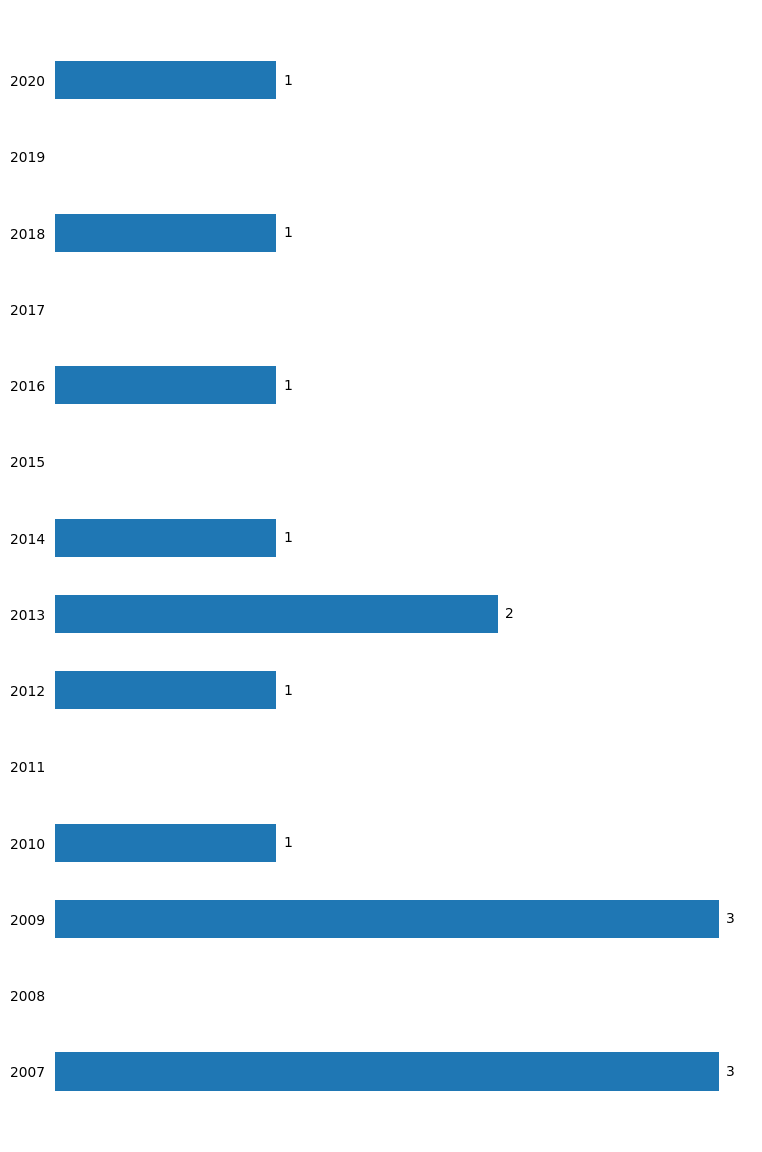

In [97]:
%matplotlib inline
barplot(attempts_per_year)

# 2007 and 2009 tied for most attempts

In [45]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Greece,4
Canada,4
Belgium,4
Brazil,2
Australia,2
United Kingdom,2
Chile,1
Russia,1


In [114]:
country_names = unique_countries(countries)

country_success = []
country_attempts = [] 

for i in range(len(country_names)):
    if i <= len(country_names) - 1:
        country_success.append([country_names[i],0])
        i = i + 1

for i in range(len(country_names)):
    if i <= len(country_names) - 1:
        country_attempts.append([country_names[i],0])
        i = i + 1

print(country_success)
print(country_attempts)


[['Mexico', 0], ['Ireland', 0], ['United States', 0], ['France', 0], ['Canada', 0], ['Australia', 0], ['Brazil', 0], ['Italy', 0], ['United Kingdom', 0], ['Puerto Rico', 0], ['Chile', 0], ['Netherlands', 0], ['Greece', 0], ['Belgium', 0], ['Russia', 0]]
[['Mexico', 0], ['Ireland', 0], ['United States', 0], ['France', 0], ['Canada', 0], ['Australia', 0], ['Brazil', 0], ['Italy', 0], ['United Kingdom', 0], ['Puerto Rico', 0], ['Chile', 0], ['Netherlands', 0], ['Greece', 0], ['Belgium', 0], ['Russia', 0]]


In [115]:
for index in range(len(data)):
    row = data[index]
    for total_attempts in country_attempts:
        country = total_attempts[0]
        if row[2] == country:
            total_attempts[1] +=1
    else: index = index + 1


for index in range(len(data)):
    row = data[index]
    if row[3] == 'Yes':
        for total_success in country_success: 
            country = total_success[0]
            if row[2] == country:
                total_success[1] += 1
    else: index = index + 1
        



In [130]:
print(country_success)
print(country_attempts)

[['Mexico', 1], ['Ireland', 1], ['United States', 6], ['France', 11], ['Canada', 3], ['Australia', 1], ['Brazil', 2], ['Italy', 1], ['United Kingdom', 1], ['Puerto Rico', 1], ['Chile', 1], ['Netherlands', 0], ['Greece', 2], ['Belgium', 2], ['Russia', 1]]
[['Mexico', 1], ['Ireland', 1], ['United States', 8], ['France', 15], ['Canada', 4], ['Australia', 2], ['Brazil', 2], ['Italy', 1], ['United Kingdom', 2], ['Puerto Rico', 1], ['Chile', 1], ['Netherlands', 1], ['Greece', 4], ['Belgium', 4], ['Russia', 1]]


In [132]:
success_rate_by_country = []

for attempts in country_attempts:
    total_attempts = attempts[1]
    for success in country_success:
        total_success = success[1]
        if attempts[0] == success[0]:
            success_rate_by_country.append([attempts[0], (total_success / total_attempts * 100)])

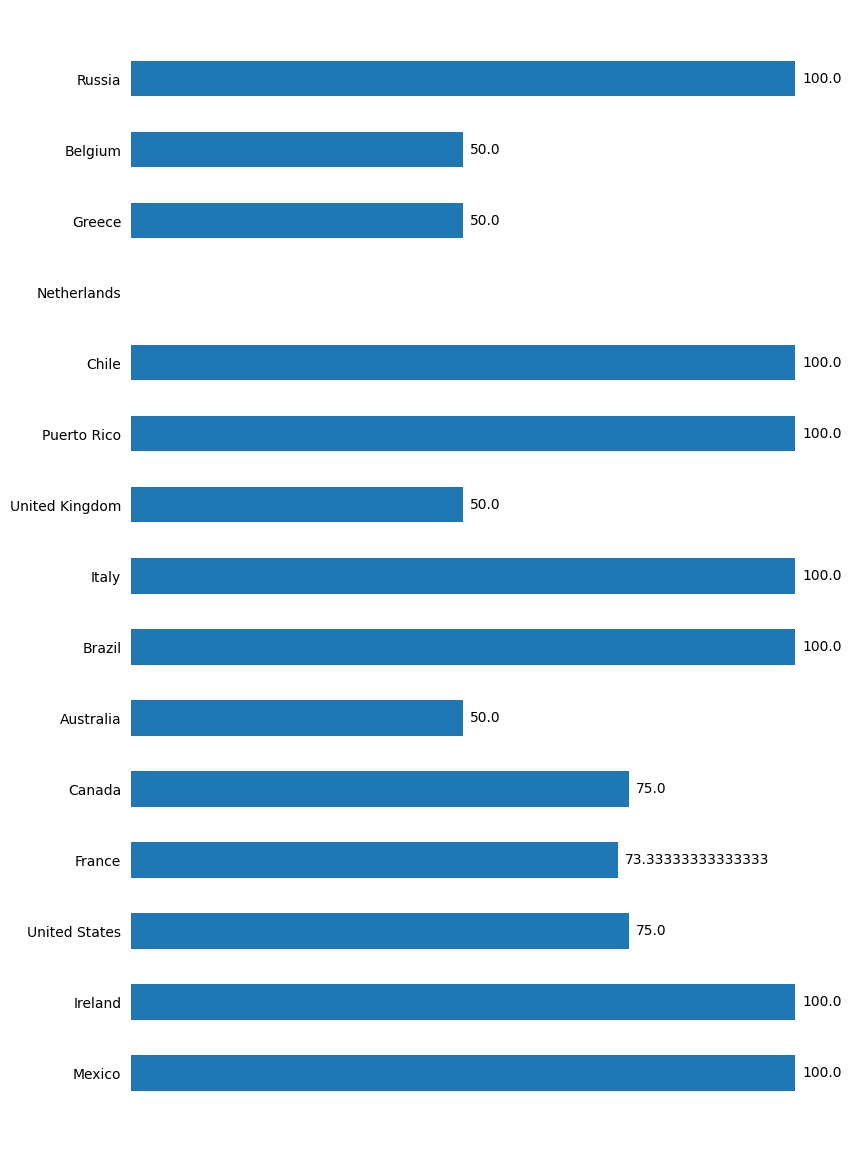

In [134]:
%matplotlib inline
barplot(success_rate_by_country)

## Results are inconclusive, as attempts go up, typically success rate goes up